In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from scipy.signal import find_peaks

(0.0, 252.99900000084398, -1.0, 2.0)

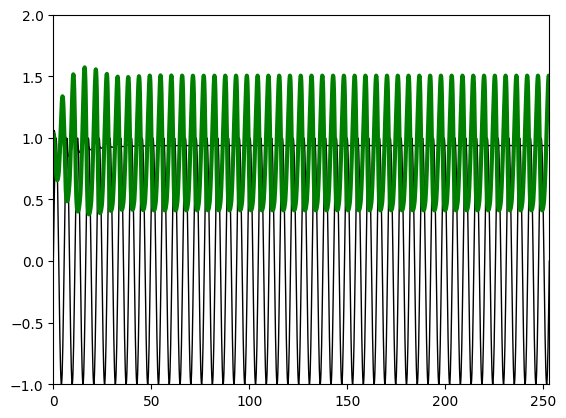

In [10]:
@njit
def Simp53(omega,A,OM,TC,test,p0,m0,M0):
    
    a = 9*TC*OM;
    b = 7*TC;
    c = .2*OM;
    d = 0.3*TC/OM;
    e = .2*TC;
    f = .4*TC;
    g = .2*TC
    
    g = g*(1+0.3)
    e = e*(1+0.3)
    b = b*(1+test)
    
    Tmax = 250
    t = 0; dt = .001; ts = 1./6; click = 0; Saf = np.zeros((int(Tmax*2/ts)+2,4));


    p = p0; m =m0; M = M0;
    nut = 0
    acc = 1
    while acc == 1:
        
        dnut = A/2*(1+np.sign(np.sin(2*np.pi/omega*t))) - 1*nut
        nut += dnut*dt
        k = 1/(1+nut)
        dp = a - b*M*p/(p+k*c);
        dm = d*p**2 - e*m
        dM = f*m - g*M;
        
        t += dt
        p += dt*dp
        m += dt*dm
        M += dt*dM
        
        if (t > Tmax and np.sin(2*np.pi/omega*t) > 0 and np.sin(2*np.pi/omega*(t-dt))<=0):
            acc = 0
        if (t > click*ts):
            Saf[click,0] = t
            Saf[click,1] = p
            Saf[click,2] = m
            Saf[click,3] = M
            click += 1
    Saf = Saf[:click,:]
    return Saf
OM = 1
om = 5.5
AA = 0.5;
TC = 1.4
p0 = 1; m0 = 1.1; M0 = 1.5
Saf = Simp53(om,0,OM,TC,0,p0,m0,M0)
x = Saf[:,1]
t = Saf[:,0]
nut = Saf[int(len(Saf[:,1])/2):,2]
plt.plot(t,x,'-k',lw=1)
plt.plot(t,np.sin(2*np.pi/om*t),'-k',lw=1)
om = 5.5
AA = 0.5;
Saf = Simp53(om,.5,OM,TC,0,p0,m0,M0)
x = Saf[:,1]
t = Saf[:,0]
nut = Saf[int(len(Saf[:,1])/2):,2]
plt.plot(t-t[0],x,'g',lw=3)
plt.axis([0,np.max(t-t[0]),-1,2])

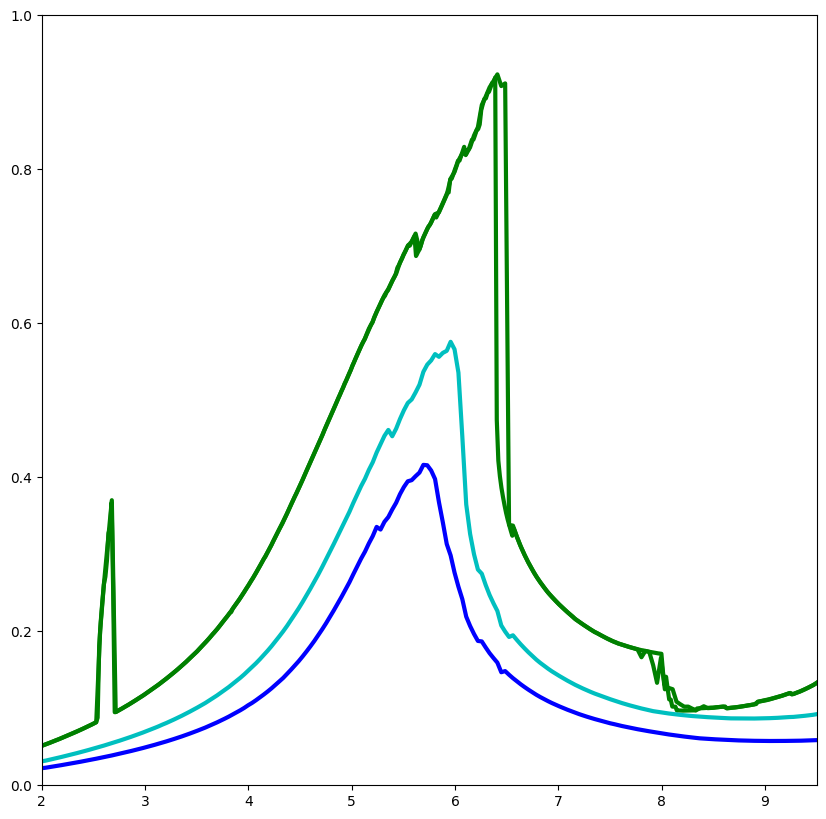

In [36]:
TC = 1.4
OM = 1
AA = 0.6
AA2 = 0.2
AA3 = 0.3
Amp = []
Amp2 = []
Amp3 = []
pt =-.1
p01 = 1.0; m01 = 1.1; M01 = 1.5
p02 = 1.0; m02 = 1.1; M02 = 1.5
p03 = 1.0; m03 = 1.1; M03 = 1.5
Omegas = np.linspace(2,9.5,200)
for om in Omegas:
    Saf = Simp53(om,AA,OM,TC,0,p01,m01,M01)
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.05,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    ampn1 = np.mean(Prop/2)
    Amp.append(ampn1/1);
    
    Saf = Simp53(om,AA2,OM,TC,0,p02,m02,M02)
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.04,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    
    ampn1 = np.mean(Prop/2)
   
    Amp2.append(ampn1/1);
    
    Saf = Simp53(om,AA3,OM,TC,0,p03,m03,M03)
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.04,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    
    ampn1 = np.mean(Prop/2)
   
    Amp3.append(ampn1/1);
AmpN = []    
Omegas2 = np.linspace(9.5,2,500)
for om in Omegas2:
    Saf = Simp53(om,AA,OM,TC,0,p01,m01,M01)
    p01 = Saf[-1,1]
    m01 = Saf[-1,2]
    M01 = Saf[-1,3]
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.05,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    ampn1 = np.mean(Prop/2)
    AmpN.append(ampn1/1); 


T = np.array([2.5,4,5.5,7,11])
A = np.array([0.24967373,0.19343474 ,0.68748454, 0.30165857 ,0.38844195])
SA = np.array([0.12796711 ,0.09932851 ,0.21219281 ,0.12775849, 0.19276216])
Amp = np.array(Amp)
Amp2 = np.array(Amp2)


plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(Omegas2,AmpN,'g',lw=3)
plt.plot(Omegas,Amp,'g',lw=3)
plt.axis([2,9.5,0,1])
plt.plot(Omegas,Amp2,'b',lw=3)
plt.plot(Omegas,Amp3,'c',lw=3)



plt.show()






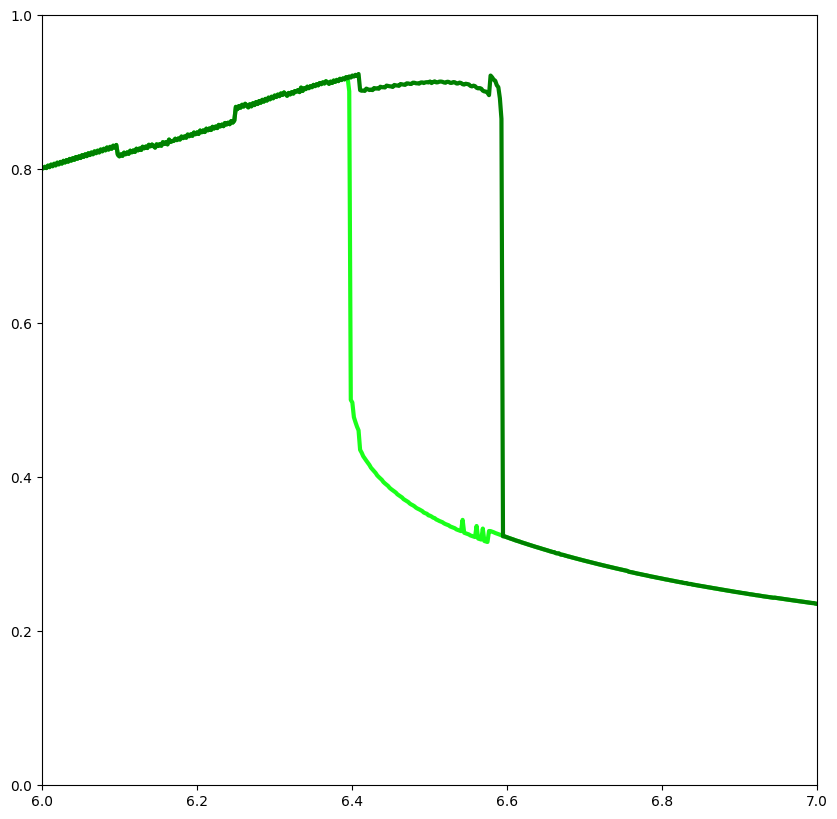

In [37]:
TC = 1.4
OM = 1
AA = 0.6
AA2 = 0.2
AA3 = 0.3
Amp = []
Amp2 = []
Amp3 = []
pt =-.1
p01 = 1.0; m01 = 1.1; M01 = 1.5
p02 = 1.0; m02 = 1.1; M02 = 1.5
p03 = 1.0; m03 = 1.1; M03 = 1.5
Omegas = np.linspace(6,7,500)
for om in Omegas:
    Saf = Simp53(om,AA,OM,TC,0,p01,m01,M01)
    x = Saf[int(len(Saf[:,1])/2):,1]
    
    
    p01 = Saf[-1,1]
    m01 = Saf[-1,2]
    M01 = Saf[-1,3]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.05,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    ampn1 = np.mean(Prop/2)
    Amp.append(ampn1/1);
    
AmpN = []
Omegas2 = np.linspace(7,6,500)
for om in Omegas2:
    Saf = Simp53(om,AA,OM,TC,0,p01,m01,M01)
    p01 = Saf[-1,1]
    m01 = Saf[-1,2]
    M01 = Saf[-1,3]
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.05,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    ampn1 = np.mean(Prop/2)
    AmpN.append(ampn1/1);
    
    

    



Amp = np.array(Amp)
AmpN = np.array(AmpN)

plt.plot(Omegas2,AmpN,color = [0.1,1.0,0.1],lw=3)
plt.plot(Omegas,Amp,'g',lw=3)
plt.axis([6,7,0,1])


plt.rcParams['figure.figsize'] = [1, 4]
plt.show()





